<a href="https://colab.research.google.com/github/subhasishsinha12/MLProjects/blob/main/Capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!pip install mysql-connector-python pandas

In [86]:
import mysql.connector
import pandas as pd

In [87]:
# Database connection parameters
db_config = {
    'host': 'cpanel.insaid.co',
    'user': 'student',
    'passwd': 'student',
    'database': 'Capstone2'
}

In [88]:
# Establishing a database connection
db_connection = mysql.connector.connect(**db_config)

In [89]:
# Query to Show all table in the current database
query = "SHOW TABLES;"

In [90]:
# Execute the query and fetch the results
cursor = db_connection.cursor()
cursor.execute(query)
table_names = cursor.fetchall()

In [91]:
# Print the list of table names
for (table_name,) in table_names:
    print(table_name)

department_data
employee_data
employee_details_data
model_evaluation_results
model_evaluation_table


In [92]:
# Query to select all data from Department Data
query_data = "SELECT * FROM department_data"

In [93]:
# Read data into a Pandas DataFrame
df_dept_data = pd.read_sql(query_data, db_connection)

<ipython-input-93-57e68ff11fbd>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dept_data = pd.read_sql(query_data, db_connection)


In [94]:
df_dept_data

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [95]:
# Query to select all data from Employee Data
query_data_1 = "SELECT * FROM employee_data"

In [96]:
# Read data into a Pandas DataFrame
df_emp_data = pd.read_sql(query_data_1, db_connection)

<ipython-input-96-288d31120bb5>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_emp_data = pd.read_sql(query_data_1, db_connection)


In [97]:
df_emp_data

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707
...,...,...,...,...,...,...,...,...,...,...,...
14145,245.0,D00-SS,NaN,0.850785,6,NaN,medium,0.225084,Employed,5.0,101809
14146,192.0,D00-SS,NaN,0.951901,3,NaN,medium,0.539834,Employed,3.0,116153
14147,175.0,D00-MN,NaN,0.854538,4,NaN,medium,0.934465,Employed,3.0,119780
14148,268.0,D00-MT,NaN,0.900887,5,NaN,medium,0.906613,Left,5.0,115325


In [98]:
# Query to select all data from Employee Details Data
query_data_2 = "SELECT * FROM employee_details_data"

In [99]:
# Read data into a Pandas DataFrame
df_emp_details = pd.read_sql(query_data_2, db_connection)

<ipython-input-99-d744101626fb>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_emp_details = pd.read_sql(query_data_2, db_connection)


In [100]:
df_emp_details

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married
...,...,...,...,...
14240,111781,26,Male,Unmarried
14241,100372,35,Male,Married
14242,128083,30,Female,Married
14243,118487,24,Male,Unmarried


In [101]:
# Closing the database connection
db_connection.close()

In [102]:
# Merging datasets
employee_df = pd.merge(df_emp_data, df_emp_details, on='employee_id', how='inner')
employee_df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42,Female,Married
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24,Female,Unmarried
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51,Female,Married
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23,Female,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14140,141.0,D00-SS,NaN,0.537866,3,NaN,low,0.610841,Employed,3.0,100833,29,Male,Unmarried
14141,168.0,D00-SS,NaN,0.643553,3,NaN,low,0.489559,Employed,3.0,118090,24,Female,Unmarried
14142,257.0,D00-SP,NaN,NaN,3,NaN,medium,0.944942,Employed,3.0,106064,27,Male,Unmarried
14143,242.0,D00-IT,NaN,0.836603,4,NaN,low,0.740136,Employed,2.0,113083,46,Male,Married


In [103]:
# Replace 'dept_id' and 'department' with the actual keys if they are different.
complete_df = pd.merge(employee_df, df_dept_data, left_on='department', right_on='dept_id', how='left')
complete_df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42,Female,Married,NaN,NaN,NaN
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23,Female,Unmarried,NaN,NaN,NaN
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51,Female,Married,D00-SP,Support,Amelia Westray
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23,Female,Unmarried,D00-SS,Sales,Edward J Bayley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14140,141.0,D00-SS,NaN,0.537866,3,NaN,low,0.610841,Employed,3.0,100833,29,Male,Unmarried,D00-SS,Sales,Edward J Bayley
14141,168.0,D00-SS,NaN,0.643553,3,NaN,low,0.489559,Employed,3.0,118090,24,Female,Unmarried,D00-SS,Sales,Edward J Bayley
14142,257.0,D00-SP,NaN,NaN,3,NaN,medium,0.944942,Employed,3.0,106064,27,Male,Unmarried,D00-SP,Support,Amelia Westray
14143,242.0,D00-IT,NaN,0.836603,4,NaN,low,0.740136,Employed,2.0,113083,46,Male,Married,D00-IT,IT,Henry Adey


In [104]:
# Let's save the complete_df to a CSV file for download
complete_df_path = r'E:\DATA SCIENCE\Datasets\complete_employee_data.csv'
complete_df.to_csv(complete_df_path, index=False)

In [105]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14145 entries, 0 to 14144
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14145 non-null  float64
 1   department         13439 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12658 non-null  float64
 4   n_projects         14145 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14145 non-null  object 
 7   satisfaction       13995 non-null  float64
 8   status             14145 non-null  object 
 9   tenure             13995 non-null  float64
 10  employee_id        14145 non-null  int64  
 11  age                14145 non-null  int64  
 12  gender             14145 non-null  object 
 13  marital_status     14145 non-null  object 
 14  dept_id            13232 non-null  object 
 15  dept_name          13232 non-null  object 
 16  dept_head          132

In [106]:
# Filling missing values for 'filed_complaint' and 'recently_promoted'
complete_df['filed_complaint'].fillna(0, inplace=True)
complete_df['recently_promoted'].fillna(0, inplace=True)
complete_df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,246.0,None,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,42,Female,Married,NaN,NaN,NaN
1,134.0,None,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,23,Female,Unmarried,NaN,NaN,NaN
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150,24,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346,51,Female,Married,D00-SP,Support,Amelia Westray
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707,23,Female,Unmarried,D00-SS,Sales,Edward J Bayley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14140,141.0,D00-SS,0.0,0.537866,3,0.0,low,0.610841,Employed,3.0,100833,29,Male,Unmarried,D00-SS,Sales,Edward J Bayley
14141,168.0,D00-SS,0.0,0.643553,3,0.0,low,0.489559,Employed,3.0,118090,24,Female,Unmarried,D00-SS,Sales,Edward J Bayley
14142,257.0,D00-SP,0.0,NaN,3,0.0,medium,0.944942,Employed,3.0,106064,27,Male,Unmarried,D00-SP,Support,Amelia Westray
14143,242.0,D00-IT,0.0,0.836603,4,0.0,low,0.740136,Employed,2.0,113083,46,Male,Married,D00-IT,IT,Henry Adey


In [107]:
# Imputing missing values for 'last_evaluation', 'satisfaction', 'tenure'
for column in ['last_evaluation', 'satisfaction', 'tenure']:
    complete_df[column].fillna(complete_df[column].median(), inplace=True)

# Handling missing department information
complete_df[['department', 'dept_id', 'dept_name', 'dept_head']] = complete_df[['department', 'dept_id', 'dept_name', 'dept_head']].fillna('Unknown')
complete_df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,246.0,Unknown,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,42,Female,Married,Unknown,Unknown,Unknown
1,134.0,Unknown,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,23,Female,Unmarried,Unknown,Unknown,Unknown
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150,24,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346,51,Female,Married,D00-SP,Support,Amelia Westray
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707,23,Female,Unmarried,D00-SS,Sales,Edward J Bayley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14140,141.0,D00-SS,0.0,0.537866,3,0.0,low,0.610841,Employed,3.0,100833,29,Male,Unmarried,D00-SS,Sales,Edward J Bayley
14141,168.0,D00-SS,0.0,0.643553,3,0.0,low,0.489559,Employed,3.0,118090,24,Female,Unmarried,D00-SS,Sales,Edward J Bayley
14142,257.0,D00-SP,0.0,0.724638,3,0.0,medium,0.944942,Employed,3.0,106064,27,Male,Unmarried,D00-SP,Support,Amelia Westray
14143,242.0,D00-IT,0.0,0.836603,4,0.0,low,0.740136,Employed,2.0,113083,46,Male,Married,D00-IT,IT,Henry Adey


In [108]:
# Check for Duplicate Rows if any,
duplicate_rows = complete_df[complete_df.duplicated()]

len(duplicate_rows)

29

In [109]:
complete_df.drop_duplicates(inplace=True)
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14116 entries, 0 to 14144
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  float64
 1   department         14116 non-null  object 
 2   filed_complaint    14116 non-null  float64
 3   last_evaluation    14116 non-null  float64
 4   n_projects         14116 non-null  int64  
 5   recently_promoted  14116 non-null  float64
 6   salary             14116 non-null  object 
 7   satisfaction       14116 non-null  float64
 8   status             14116 non-null  object 
 9   tenure             14116 non-null  float64
 10  employee_id        14116 non-null  int64  
 11  age                14116 non-null  int64  
 12  gender             14116 non-null  object 
 13  marital_status     14116 non-null  object 
 14  dept_id            14116 non-null  object 
 15  dept_name          14116 non-null  object 
 16  dept_head          14116 no

In [110]:
# Encoding categorical variables
complete_emp_df = pd.get_dummies(complete_df, columns=['department', 'gender', 'marital_status'], drop_first=True)
salary_order = {'low': 1, 'medium': 2, 'high': 3}
complete_emp_df['salary'] = complete_df['salary'].map(salary_order)
complete_emp_df

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,...,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,department_Unknown,gender_Male,marital_status_Unmarried
0,246.0,0.0,0.866838,6,0.0,2,0.134415,Left,4.0,124467,...,False,False,False,False,False,False,False,True,False,False
1,134.0,0.0,0.555718,2,0.0,1,0.511041,Left,3.0,112210,...,False,False,False,False,False,False,False,True,False,True
2,156.0,1.0,0.474082,2,0.0,2,0.405101,Left,3.0,126150,...,False,False,False,False,False,True,False,False,False,True
3,256.0,0.0,0.961360,6,0.0,1,0.152974,Left,4.0,125346,...,False,False,False,False,True,False,False,False,False,False
4,146.0,0.0,0.507349,2,0.0,2,0.434845,Left,3.0,113707,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14140,141.0,0.0,0.537866,3,0.0,1,0.610841,Employed,3.0,100833,...,False,False,False,False,False,True,False,False,True,True
14141,168.0,0.0,0.643553,3,0.0,1,0.489559,Employed,3.0,118090,...,False,False,False,False,False,True,False,False,False,True
14142,257.0,0.0,0.724638,3,0.0,2,0.944942,Employed,3.0,106064,...,False,False,False,False,True,False,False,False,True,True
14143,242.0,0.0,0.836603,4,0.0,1,0.740136,Employed,2.0,113083,...,False,False,False,False,False,False,False,False,True,False


In [111]:
complete_emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14116 entries, 0 to 14144
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   avg_monthly_hrs           14116 non-null  float64
 1   filed_complaint           14116 non-null  float64
 2   last_evaluation           14116 non-null  float64
 3   n_projects                14116 non-null  int64  
 4   recently_promoted         14116 non-null  float64
 5   salary                    14116 non-null  int64  
 6   satisfaction              14116 non-null  float64
 7   status                    14116 non-null  object 
 8   tenure                    14116 non-null  float64
 9   employee_id               14116 non-null  int64  
 10  age                       14116 non-null  int64  
 11  dept_id                   14116 non-null  object 
 12  dept_name                 14116 non-null  object 
 13  dept_head                 14116 non-null  object 
 14  department_

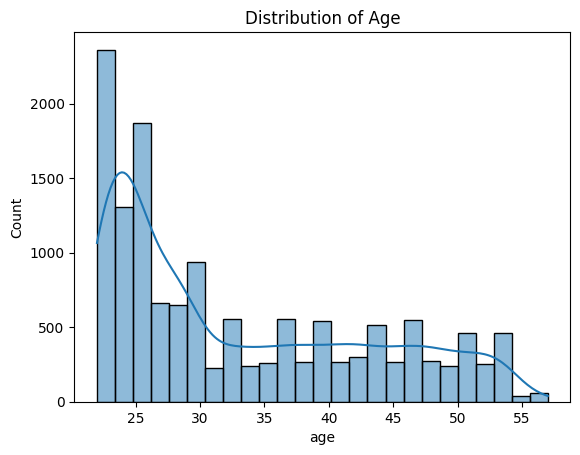

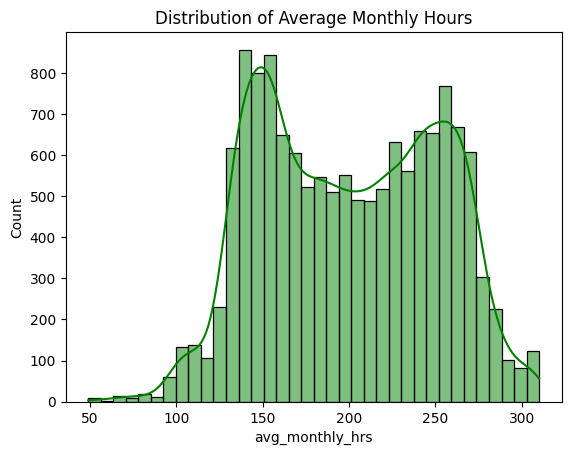

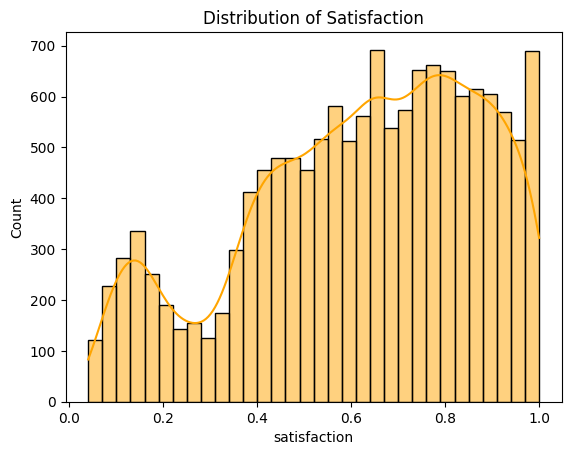

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'age'
sns.histplot(data=complete_emp_df, x='age', kde=True)
plt.title('Distribution of Age')
plt.show()

# Average monthly hours
sns.histplot(data=complete_emp_df, x='avg_monthly_hrs', kde=True, color='green')
plt.title('Distribution of Average Monthly Hours')
plt.show()

# Satisfaction
sns.histplot(data=complete_emp_df, x='satisfaction', kde=True, color='orange')
plt.title('Distribution of Satisfaction')
plt.show()


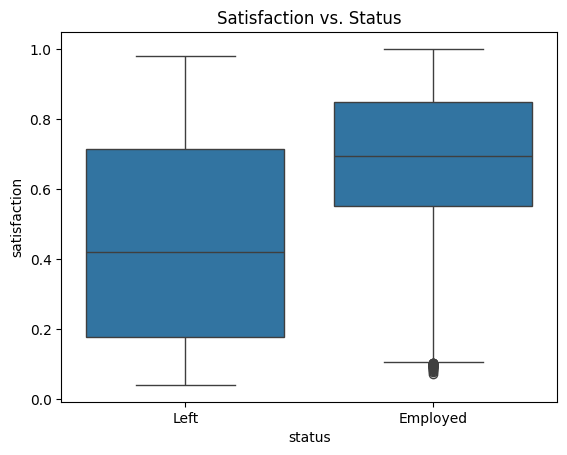

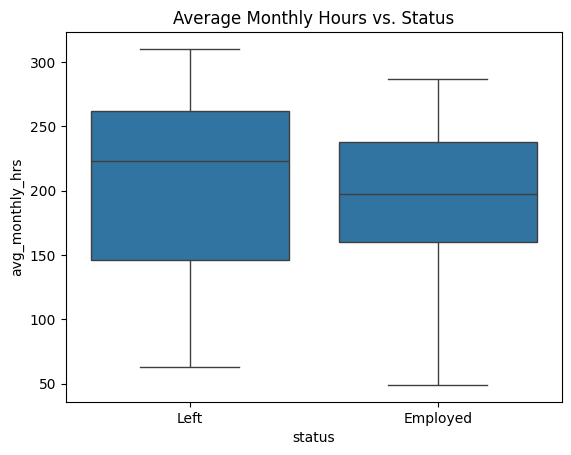

In [113]:
# Box plot for 'satisfaction' by 'status'
sns.boxplot(x='status', y='satisfaction', data=complete_emp_df)
plt.title('Satisfaction vs. Status')
plt.show()

# Average monthly hours by status
sns.boxplot(x='status', y='avg_monthly_hrs', data=complete_emp_df)
plt.title('Average Monthly Hours vs. Status')
plt.show()


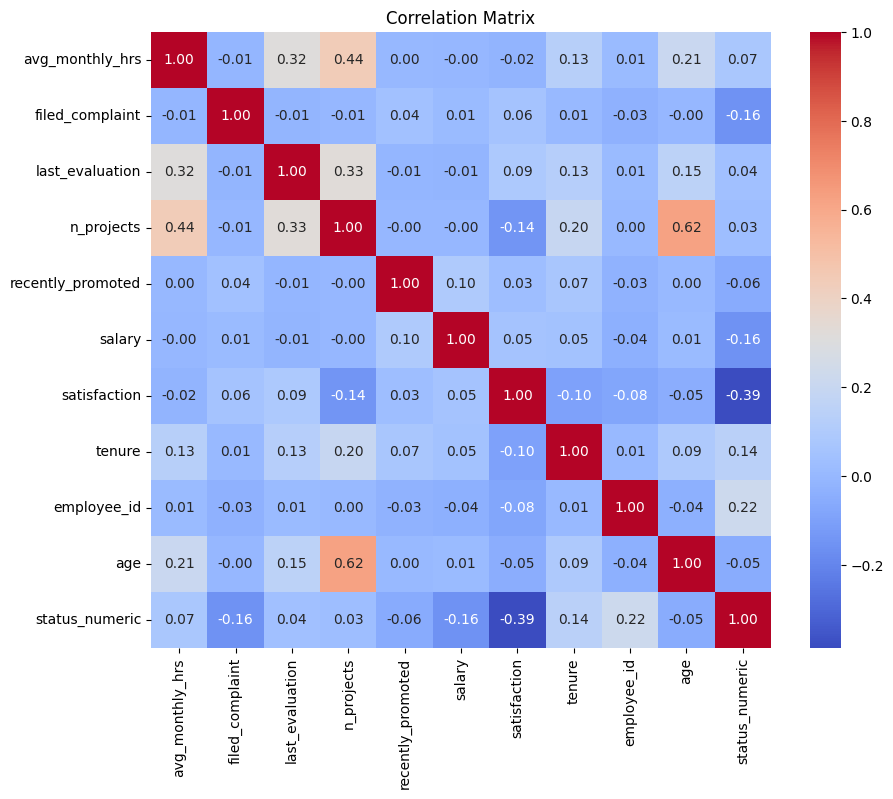

In [114]:
import numpy as np

# Convert 'status' to a numeric format
complete_emp_df['status_numeric'] = complete_emp_df['status'].map({'Left': 1, 'Employed': 0})

# Now, when calculating the correlation matrix, exclude non-numeric columns manually or select only numeric columns
correlation_matrix = complete_emp_df.select_dtypes(include=[np.number]).corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


In [115]:
# Interaction feature engeneering
complete_emp_df['satisfaction_evaluation'] = complete_emp_df['satisfaction'] * complete_emp_df['last_evaluation']
complete_emp_df

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,...,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,department_Unknown,gender_Male,marital_status_Unmarried,status_numeric,satisfaction_evaluation
0,246.0,0.0,0.866838,6,0.0,2,0.134415,Left,4.0,124467,...,False,False,False,False,False,True,False,False,1,0.116516
1,134.0,0.0,0.555718,2,0.0,1,0.511041,Left,3.0,112210,...,False,False,False,False,False,True,False,True,1,0.283995
2,156.0,1.0,0.474082,2,0.0,2,0.405101,Left,3.0,126150,...,False,False,False,True,False,False,False,True,1,0.192051
3,256.0,0.0,0.961360,6,0.0,1,0.152974,Left,4.0,125346,...,False,False,True,False,False,False,False,False,1,0.147063
4,146.0,0.0,0.507349,2,0.0,2,0.434845,Left,3.0,113707,...,False,False,False,True,False,False,False,True,1,0.220618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14140,141.0,0.0,0.537866,3,0.0,1,0.610841,Employed,3.0,100833,...,False,False,False,True,False,False,True,True,0,0.328551
14141,168.0,0.0,0.643553,3,0.0,1,0.489559,Employed,3.0,118090,...,False,False,False,True,False,False,False,True,0,0.315057
14142,257.0,0.0,0.724638,3,0.0,2,0.944942,Employed,3.0,106064,...,False,False,True,False,False,False,True,True,0,0.684741
14143,242.0,0.0,0.836603,4,0.0,1,0.740136,Employed,2.0,113083,...,False,False,False,False,False,False,True,False,0,0.619200


In [116]:
complete_emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14116 entries, 0 to 14144
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   avg_monthly_hrs           14116 non-null  float64
 1   filed_complaint           14116 non-null  float64
 2   last_evaluation           14116 non-null  float64
 3   n_projects                14116 non-null  int64  
 4   recently_promoted         14116 non-null  float64
 5   salary                    14116 non-null  int64  
 6   satisfaction              14116 non-null  float64
 7   status                    14116 non-null  object 
 8   tenure                    14116 non-null  float64
 9   employee_id               14116 non-null  int64  
 10  age                       14116 non-null  int64  
 11  dept_id                   14116 non-null  object 
 12  dept_name                 14116 non-null  object 
 13  dept_head                 14116 non-null  object 
 14  department_

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Prepare your feature matrix X and target vector y
X = complete_emp_df.drop(['status_numeric', 'status', 'employee_id', 'dept_id', 'dept_name', 'dept_head','satisfaction','last_evaluation' ], axis=1)
y = complete_emp_df['status_numeric']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model - Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2147
           1       0.58      0.30      0.40       677

    accuracy                           0.78      2824
   macro avg       0.69      0.62      0.63      2824
weighted avg       0.75      0.78      0.75      2824

[[1999  148]
 [ 473  204]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2147
           1       0.98      0.92      0.95       677

    accuracy                           0.98      2824
   macro avg       0.98      0.96      0.97      2824
weighted avg       0.98      0.98      0.98      2824



In [119]:
# Feature importances from Random Forest
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                          importance
satisfaction_evaluation     0.265611
n_projects                  0.209175
avg_monthly_hrs             0.195397
tenure                      0.190565
age                         0.045044
salary                      0.018535
filed_complaint             0.014999
marital_status_Unmarried    0.013010
gender_Male                 0.010870
department_D00-TP           0.004911
department_D00-SS           0.004642
department_D00-SP           0.004580
department_D00-ENG          0.004524
department_D00-MN           0.002624
department_D00-IT           0.002561
department_Unknown          0.002419
department_D00-FN           0.002367
recently_promoted           0.002053
department_D00-PD           0.002051
department_D00-MT           0.001960
department_D00-AD           0.001249
department_D00-PR           0.000854
